## My Capstone Project - Diamonds
* Diamond Price Prediction
* Using Kaggle Dataset

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/drive/MyDrive/ST1Capstone_Project

/content/drive/MyDrive/ST1Capstone_Project


In [53]:
!ls /content/drive/MyDrive/ST1Capstone_Project

DataForML.pkl  Diamonds.csv  Diamonds.ipynb  UCC_student_u3216190StudentID


**This Project is based on Diamonds Price Prediction**

(https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction).

* This classic dataset contains the prices and other attributes of
almost 54,000 diamonds.
* It's a great dataset for beginners learning to work with data analysis and visualization.
* My project task is to create a machine learning model which can predict the diamond pricing based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on
(machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.




# Step 1: Reading the dataset

In [54]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Reading the Diamonds dataset
Diamonds_data = pd.read_csv('/content/drive/MyDrive/ST1Capstone_Project/Diamonds.csv')
print('Shape before deleting duplicate values:', Diamonds_data.shape)

# Removing duplicate rows if any
Diamonds_data = Diamonds_data.drop_duplicates()
print('Shape After deleting duplicate values:', Diamonds_data.shape)

# Printing sample data
print(Diamonds_data.head(10))




Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


**Key Observations from Step1 about Data Description**
*  **Dataset Content**: The dataset contains details of almost 54,000 diamonds, including attributes related to their prices and physical characteristics.
* **Attributes Overview:**
Price: The price of the diamonds in US dollars ($326--$18,823).
* **Carat:** The weight of the diamonds, ranging from 0.2 to 5.01 carats.
* **Cut:** The quality of the cut categorized as Fair, Good, Very Good, Premium, and Ideal.
* **Color:** The color of the diamonds, graded from J (worst) to D (best).
* **Clarity:** A measurement of how clear the diamonds are, rated from I1 (worst) to IF (best).
* **Dimensions (x, y, z)**: Length, width, and depth of the diamonds in millimeters.
* **Depth:** The total depth percentage calculated as z divided by the mean of x and y, or 2 times z divided by the sum of x and y.
* **Table:** The width of the top of the diamond relative to the widest point.
* **Data Range:** diamond price ranges from $326 to $18,823.
Carat weight varies from 0.2 to 5.01 carats.
* The dimensions x, y, and z have ranges of 0 to 10.74 mm, 0 to 58.9 mm, and 0 to 31.8 mm, respectively.
*Depth percentages range from 43% to 79%, and table widths range from 43 to 95.
* **Data Quality:** There are no missing values in the dataset, ensuring completeness for analysis and modeling tasks.
* Data Types: The dataset includes a mix of numerical (price, carat, dimensions, depth, table) and categorical (cut, color, clarity) variables, providing a diverse set of features for analysis.
***Target Variable:*** The target variable for analysis and prediction tasks is the price of the diamonds, which makes it suitable for regression modeling and price prediction tasks.



 # Step 2 : Problem Statement Definition
Develop a predictive model to estimate the price for the diamond on a set of predictor variables.

* Target variable: price.

* Possible Predictor/Features: carat, cut, color,clarity, depth, table, price, x, y, z.

* Predictor/Features: carat, depth, x, y, z.






# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous.**

#Step 4: Target Variable Identification.
### Looking at the class distribution:
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.


# Step 5: Visualising the distribution of Target variable

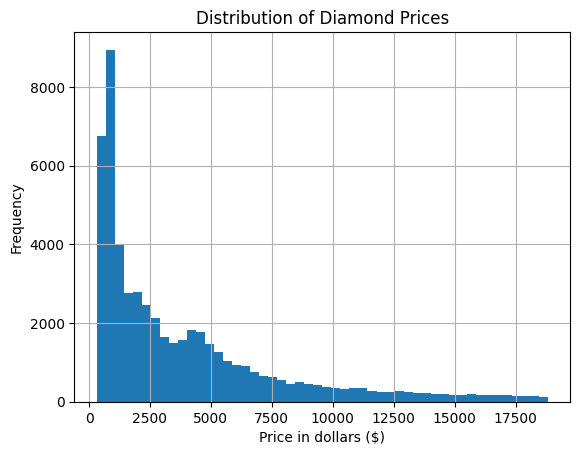

In [56]:
import matplotlib.pyplot as plt
#Creating histogram as the Target variable is Continuous.
#This will help us to understand the distribution of Diamonds dataset.
Diamonds_data['price'].hist(bins = 50) # bins change the x axis

plt.title('Distribution of Diamond Prices')
plt.xlabel('Price in dollars ($)')
plt.ylabel('Frequency')

plt.show()


### Observations from Step 5a (From above graph):
* Price is right-skewed need to make it less skewed aiming for a bell-curve.
* The data distribtion of the target variable is not satisfactory to proceed further hence it requires further work.

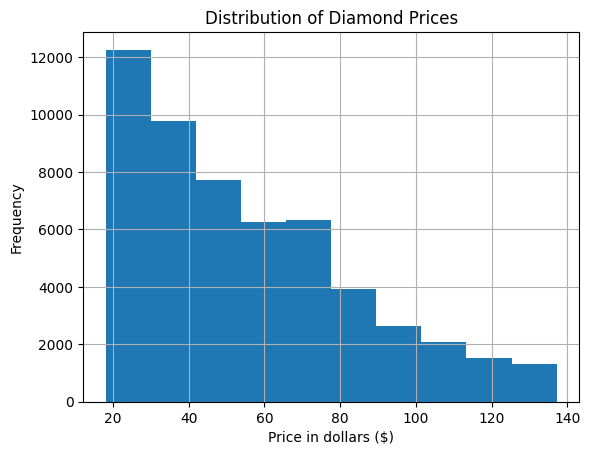

In [57]:
sqrtPrice = np.sqrt(Diamonds_data['price'])
sqrtPrice.hist()

plt.title('Distribution of Diamond Prices')
plt.xlabel('Price in dollars ($)')
plt.ylabel('Frequency')

plt.show()

### Observations from Step 5b (From above graph):
* Price is still right-skewed although the price per frequency has changed.
* The data distribtion of the target variable is not satisfactory hence it requires further work.

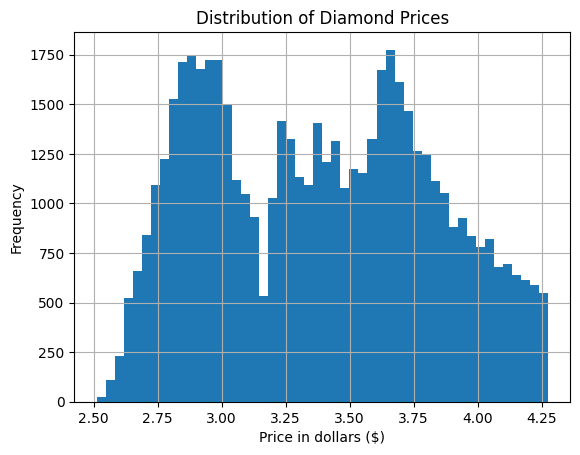

In [58]:
logPrice = np.log10(Diamonds_data['price'])
logPrice.hist(bins = 50)

plt.title('Distribution of Diamond Prices')
plt.xlabel('Price in dollars ($)')
plt.ylabel('Frequency')

plt.show()

### Observations from Step 5c (From above graph):
* Price less skewed closer to a bell-curve.
* The data distribtion of the target variable is satisfactory to proceed further.

# Step 6: Basic Exploratory Data Analysis
* This step is performed to guage the performance of the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
* This helps to start the column/data rejection process.
* Look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
* There are four commands which are used for Basic data exploratory Analysis in Python:
* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous.



In [59]:
# Looking at sample rows in data
Diamonds_data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [60]:
# Looking at sample rows in data
Diamonds_data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [61]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [62]:
# Looking at the descriptive statistics of the data
Diamonds_data.describe(include='all')


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000


In [63]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
Diamonds_data.nunique()


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

### Observations from Step 6 - Basic Exploratory Data Analysis
* The dataset comprises 53,794 entries with 10 attributes for each entry.
* All columns have non-null entries, suggesting there are no missing values.
* Numerical values: carat, depth, table, price, x, y, z.
* **carat:** Continous.
* **depth:** Continous.
* **table:** Continous.
* **price** ($326-$18,823): Continous.
* **x, y, z** (dimensions): Continous.
* **cut**: Categorical.
* **color**: Categorical.
* **clarity**: Catergoical.
* **Identification of Categorical vs. Continuous Variables:**
* cut, color, and clarity are categorical because they have fewer than 20 unique values each.
* The rest of the variables are treated as continuous due to a higher number of unique values.
* **Potential Outliers and Anomalies:**
The presence of zero values in x, y, and z might require further investigation as they could represent data entry errors.

# Step 7: Removing unwanted columns

* removed index as it does not relate affect the price of diamond



# Step 8: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be
* Based on the Basic Exploration Data Analysis in the previous step, we could spotted 3 categorical predictors in the data
grouped by those unique values.
* **Categorical Predictors:**
* cut
* color
* clarity
* We will use bar charts to see how the data is distributed for these categorical columns.


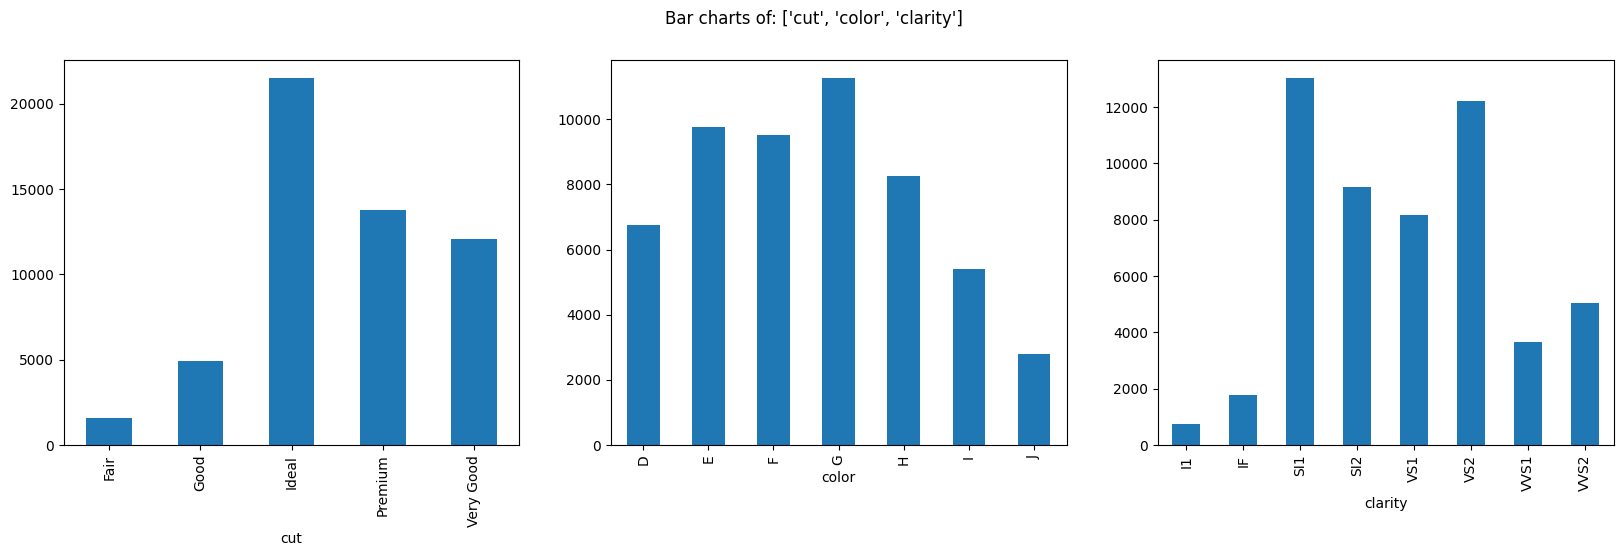

In [64]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=Diamonds_data, colsToPlot=['cut','color', 'clarity'])

### Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the two data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency.
* Hence, there are enough rows for each category in the data for the
ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in
very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step coming up, and take a final call to select or reject the column/data attribute.
* In this dataset, it is worth noting that "CHAS" is skewed.
* There is just one bar which is dominating and other one have very less rows.
* Such columns may not be correlated with the target variable because there is no information to learn.
* The algorithms cannot find any rule like when the value is this then the target variable is that.
* Whenever in doubt, always investigate the column further.
* Selected Categorical Variables ('cut', 'color', 'clarity'): Both the categorical variables are selected for further analysis.


# Step 9 - Visualize distribution of all Continuous Predictor variables:
* Based on the Basic Exploratory Data Analysis, there are 7 continuous predictor variables: 'carat', 'depth', 'table','price', 'x','y',and 'z'.

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

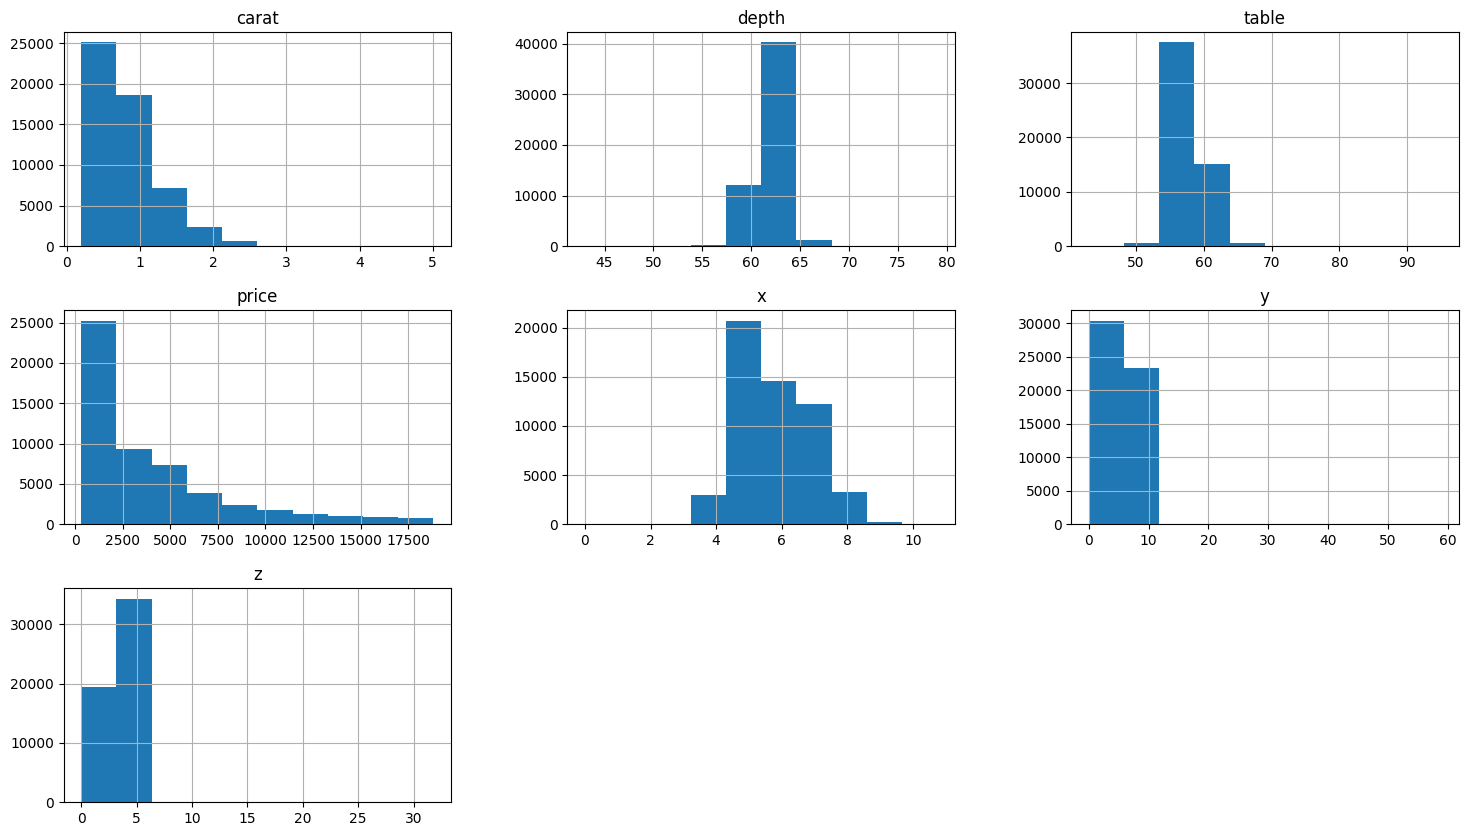

In [65]:
# Plotting histograms of multiple columns together
Diamonds_data.hist(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], figsize=(18, 10))


### Observations from Step 9:
* Carat: Most diamonds have a carat weight under 1.5, with a significant peak around 0.3 carats. This suggests that smaller diamonds are more common in the dataset.
* Depth: The depth percentage of the diamonds mostly clusters between 60% and 65%. This is a relatively tight distribution indicating standard cutting practices in the diamond industry.

* The depth in millimeters (z) has a prominent peak slightly under 3 mm, and most diamonds are concentrated under 5 mm of depth. The distribution's shape and range are consistent with typical diamond proportions relative to their carat weight and table/depth percentages.

# Step 10: Outlier Analysis



* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.
* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column.
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [66]:
import pandas as pd

# Assuming Diamonds_data is already loaded
# Example of loading data:
# Diamonds_data = pd.read_csv('Diamonds.csv')

# Finding the highest 'price' values under $15,000 and sorting them in descending order
print("Nearest values to $15,000 mark:")
nearest_under_15000 = Diamonds_data['price'][Diamonds_data['price'] < 15000].sort_values(ascending=False)
print(nearest_under_15000)


Nearest values to $15,000 mark:
25883    14998
25882    14998
25881    14982
25880    14982
25879    14982
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 52146, dtype: int64


### Observation:
* Any price above $15,000 is an outlier based on the distribution of price.

* Nearest logical value is $14,500.

In [67]:
# Replacing outliers with nearest possibe value
Diamonds_data['price'][Diamonds_data['price']>15000] =14500


# Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'price'}>]], dtype=object)

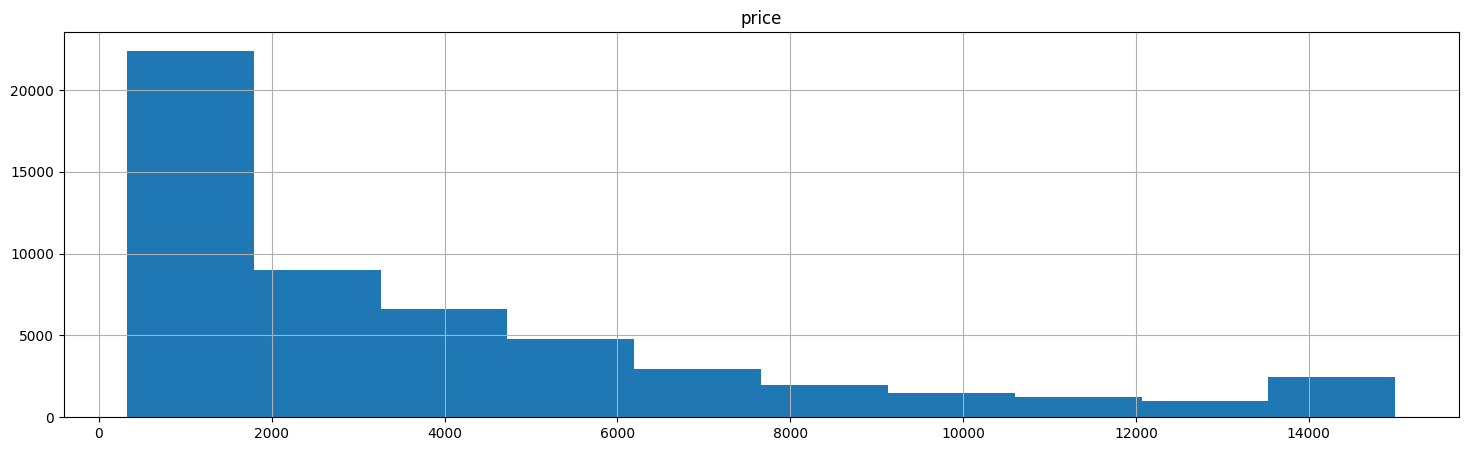

In [68]:
Diamonds_data.hist(['price'], figsize=(18,5))

### Observation from Step 11:
* The distribution of diamond prices has become more representative and stable following the outlier treatment.

* Despite the right skew, the distribution's thickness towards its tail suggests an acceptable range of variation within the upper price segments, confirming the effectiveness of the capping method in normalizing the data distribution for further analysis.

#Step 12: Missing Values Analysis
* Miissing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic.

In [69]:
# Finding how many missing values are there for each column
Diamonds_data.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Observations from Step 12: Missing Value Analysis
*
*

# step 13: Feature Selection (Attribute Selection)
* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get
a better sense of data.
* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength
statistically.
* Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test
* For this dataset, the Target variable is Continuous, hence following two scenarios will need attention
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor



## Relationship exploration: Continous Vs Continous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables
using scatter plot and measure the strength of relation using a metric called pearson's correlation value.


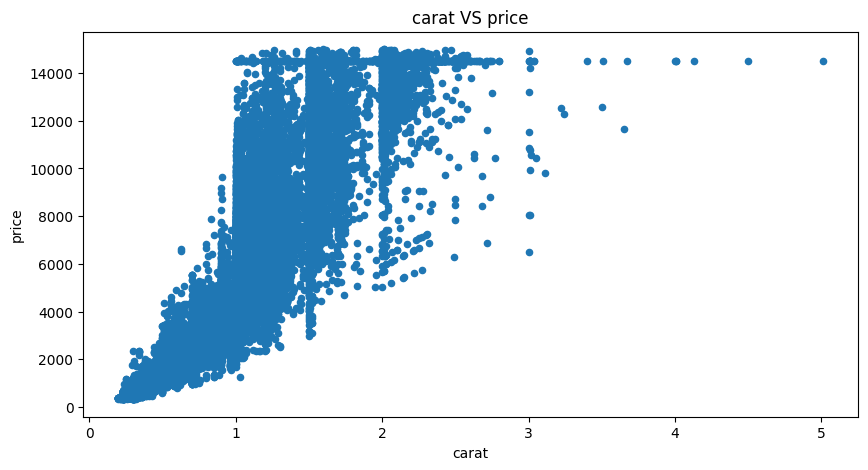

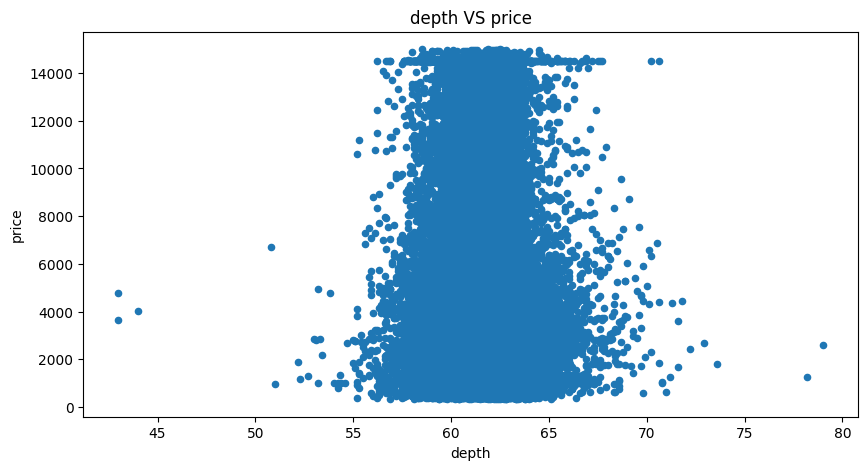

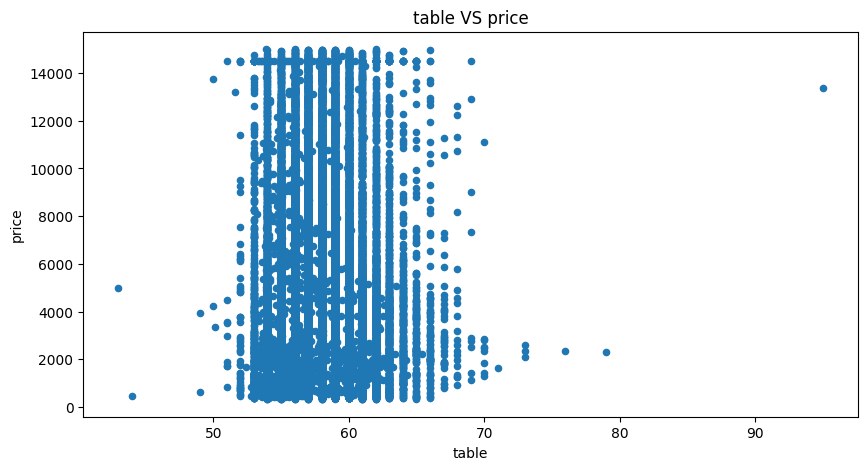

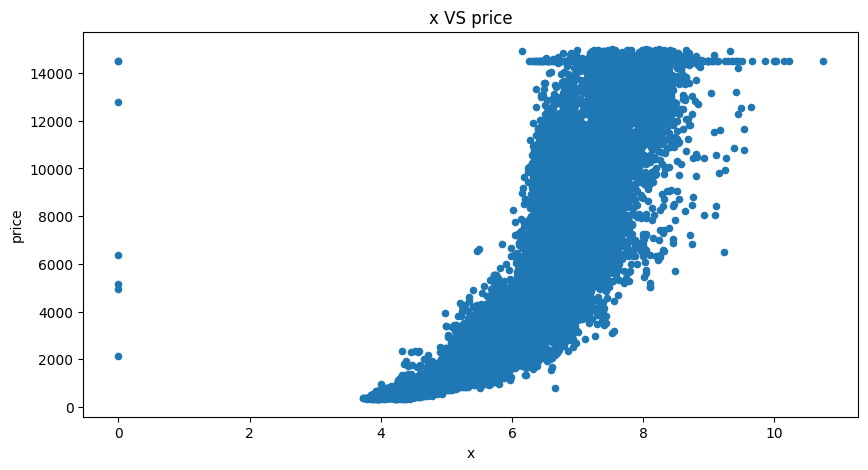

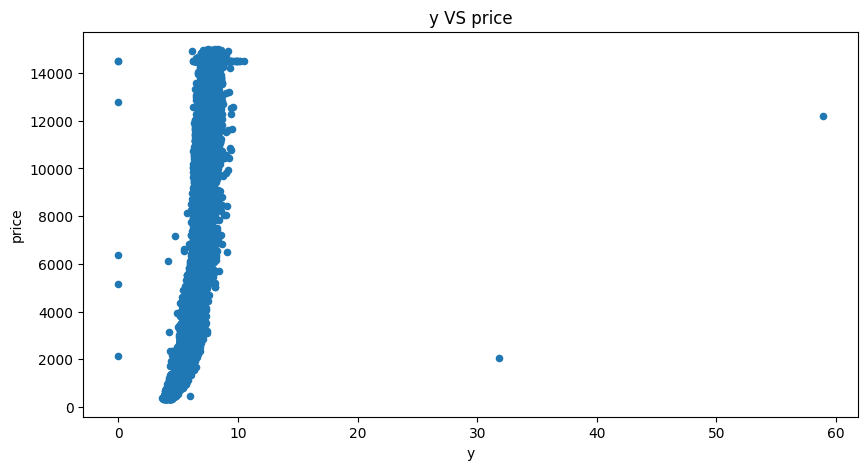

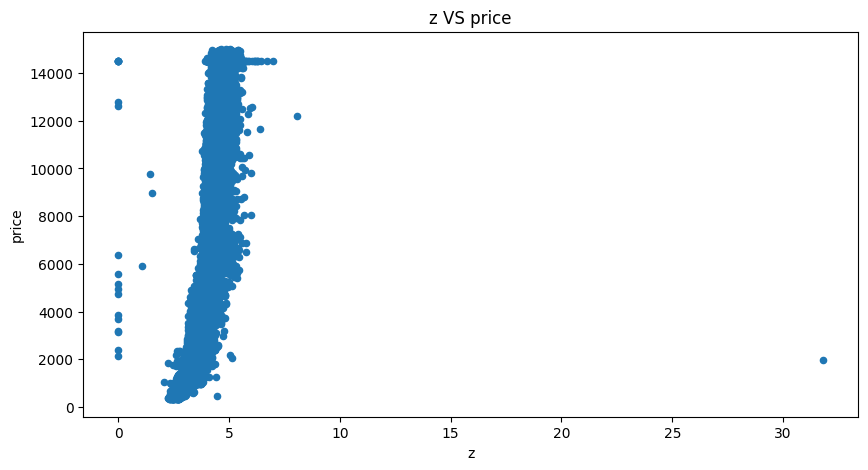

In [70]:
import matplotlib.pyplot as plt

# Define the list of continuous columns you want to analyze against 'price'
ContinuousCols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Plotting scatter chart for each predictor vs the target variable 'price'
for predictor in ContinuousCols:
    Diamonds_data.plot.scatter(x=predictor, y='price', figsize=(10, 5), title=predictor + " VS " + 'price')
    plt.show()  # Display the plot



### Scatter charts interpretation
* What should you look for in these scatter charts?
Trend.
* You should try to see if there is a visible trend or not. There could be three scenarios
* Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one
value increases, other also increases. This is good for ML model building!
* Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if
one value increases, other decreases. This is also good for ML model building!
* No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that
predictor/feature may not be the best one for ML model building.
* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation
value in the next step.

# Step 14: Statistical Feature Selection (Continous Vs Continous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard
deviations (denominator):
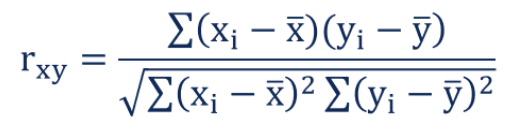
* This value can be calculated only between two numeric columns Correlation between [-1,0) means inversely proportional, the scatter plot
will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between
Target variable and all other predictor variables(s) to check which columns/features/predictors are
actually related to the target variable in question.



In [71]:
# Assuming Diamonds_data is a pandas DataFrame already loaded with your diamond data
# Example of loading data:
# Diamonds_data = pd.read_csv('path_to_diamonds_data.csv')

# Define the list of continuous columns for which we want to compute the correlation matrix
ContinuousCols = [
    'carat',   # Weight of the diamond
    'depth',   # Total depth percentage = z / mean(x, y) = 2 * z / (x + y)
    'table',   # Width of the top of the diamond relative to the widest point
    'price',   # Price of the diamond
    'x',       # Length in mm
    'y',       # Width in mm
    'z'        # Depth in mm
]

# Creating the correlation matrix
CorrelationData = Diamonds_data[ContinuousCols].corr()

# Display the correlation matrix
print("Correlation matrix for Diamonds_data:")
print(CorrelationData)


Correlation matrix for Diamonds_data:
          carat     depth     table     price         x         y         z
carat  1.000000  0.027861  0.181091  0.926988  0.975380  0.951908  0.953542
depth  0.027861  1.000000 -0.297669 -0.009334 -0.025348 -0.029389  0.094757
table  0.181091 -0.297669  1.000000  0.129302  0.194855  0.183231  0.150270
price  0.926988 -0.009334  0.129302  1.000000  0.896734  0.877403  0.873699
x      0.975380 -0.025348  0.194855  0.896734  1.000000  0.974592  0.970686
y      0.951908 -0.029389  0.183231  0.877403  0.974592  1.000000  0.951844
z      0.953542  0.094757  0.150270  0.873699  0.970686  0.951844  1.000000


In [72]:
# Assuming Diamonds_data is a pandas DataFrame already loaded with your diamond data
# Example of loading data:
# Diamonds_data = pd.read_csv('path_to_diamonds_data.csv')

# Define the list of continuous columns including 'price'
ContinuousCols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Creating the correlation matrix for these variables
CorrelationData = Diamonds_data[ContinuousCols].corr()

# Filtering only those columns where the absolute correlation with 'price' is greater than 0.5
high_correlation_cols = CorrelationData['price'][abs(CorrelationData['price']) > 0.5]

# Display the highly correlated columns
print("Columns with absolute correlation greater than 0.5 with 'price':")
print(high_correlation_cols)


Columns with absolute correlation greater than 0.5 with 'price':
carat    0.926988
price    1.000000
x        0.896734
y        0.877403
z        0.873699
Name: price, dtype: float64


### Observations from Step 14
* Final selected Continuous columns:
* **'carat', 'x', 'y', 'z'**




# Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
* Measure the strength of relation using Anova test.




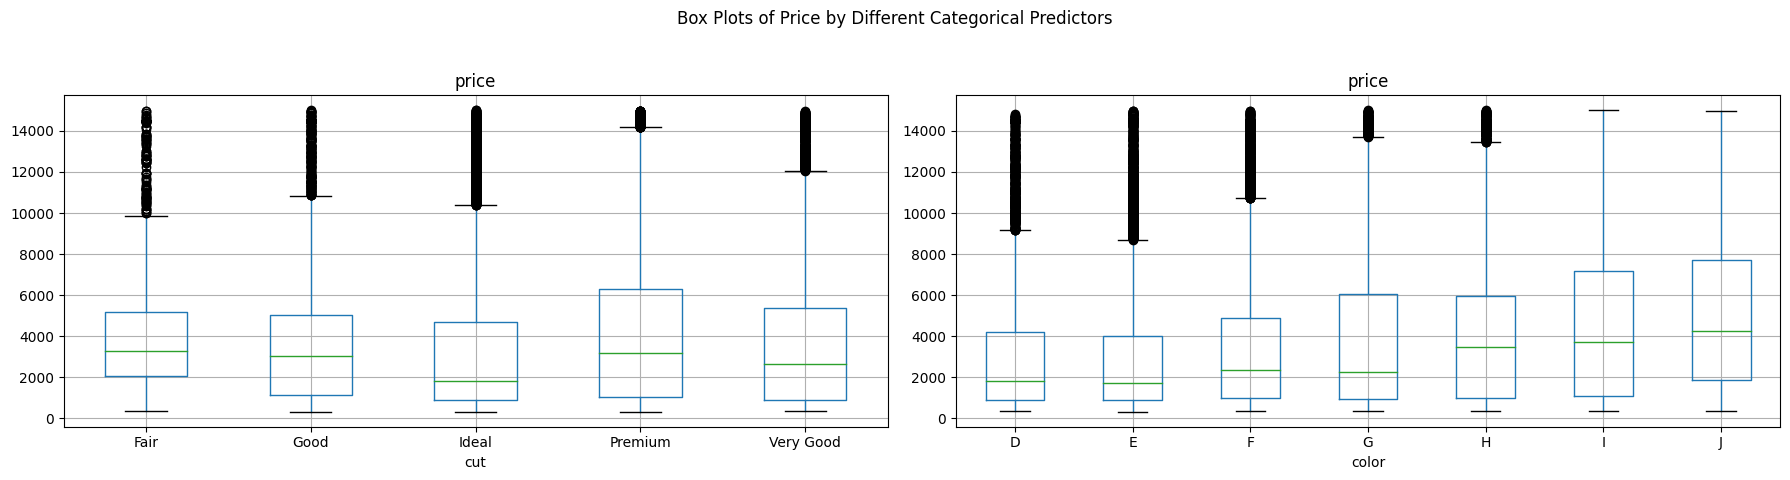

In [73]:
# Assuming Diamonds_data is a pandas DataFrame already loaded with your diamond data
# Example of loading data:
# Diamonds_data = pd.read_csv('path_to_diamonds_data.csv')

# List of categorical columns we are interested in
CategoricalColsList = ['cut', 'color']

# Setting up the plotting canvas
fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each categorical predictor against the Target Variable "price"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Diamonds_data.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Improving plot aesthetics
plt.suptitle('Box Plots of Price by Different Categorical Predictors')  # Title for the entire figure
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()  # Display the plots


# Observations from Step 15: Box-Plots interpretation
* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the
target variable. Hence, the variables are not correlated to each other.
* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be
correlated with MEDV.
* For this datadata, both the categorical predictors looks correlated with the Target variable.
* We confirm this by looking at the results of ANOVA test below
O.

#  Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [74]:
import pandas as pd
from scipy.stats import f_oneway

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors = []
    print('##### ANOVA Results ##### \n')

    for predictor in CategoricalPredictorList:
        # Grouping the data by categories and storing each as a list
        CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
        # Performing ANOVA using f_oneway from scipy.stats
        AnovaResults = f_oneway(*CategoryGroupLists)

        # Checking the P-Value
        if (AnovaResults[1] < 0.05):  # Using a significance level of 0.05
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return SelectedPredictors

# Assuming Diamonds_data is already loaded as a pandas DataFrame
# Example of loading data:
# Diamonds_data = pd.read_csv('path_to_diamonds_data.csv')

# List of categorical predictors in the Diamonds_data
CategoricalPredictorList = ['cut', 'color', 'clarity']

# Calling the function to check which categorical variables are correlated with the target variable 'price'
SelectedPredictors = FunctionAnova(
    inpData=Diamonds_data,
    TargetVariable='price',
    CategoricalPredictorList=CategoricalPredictorList
)

print("Selected Predictors after ANOVA Test:", SelectedPredictors)


##### ANOVA Results ##### 

cut is correlated with price | P-Value: 3.318059096265208e-154
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 3.56e-321
Selected Predictors after ANOVA Test: ['cut', 'color', 'clarity']


### Observations from Step 16:
* Based on the results of the ANOVA tests, we can confidently confirm our visual assessments obtained from the box plots earlier.
* All categorical variables, specifically 'cut', 'color', and 'clarity' are correlated with the target variable 'price'.
* This is something you can infer by observing the differences in the distribution across these categories from the box plots.
* Final selected Categorical columns: **'cut', 'color', 'clarity'.**



### Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning
model building as:
* **'carat', 'cut', 'clarity', 'x', 'y', 'z', 'table' and 'depth'.**

In [75]:
# List of selected columns based on the analysis for the Diamonds_data
SelectedColumns = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'table', 'depth']

# Selecting final columns for machine learning from the Diamonds_data
DataForML = Diamonds_data[SelectedColumns]

# Displaying the first few rows of the selected data to verify the selection
DataForML.head()


,carat,cut,color,clarity,x,y,z,table,depth
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,55.0,61.5
1,0.21,Premium,E,SI1,3.89,3.84,2.31,61.0,59.8
2,0.23,Good,E,VS1,4.05,4.07,2.31,65.0,56.9
3,0.29,Premium,I,VS2,4.20,4.23,2.63,58.0,62.4
4,0.31,Good,J,SI2,4.34,4.35,2.75,58.0,63.3


In [76]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')


# Step 17: Data Pre-processing for Machine Learning Model Building or Model Development


* List of steps that needs to be performed on predictor variables before data can be used for machine learning
* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt.
* Important if you are using distance based algorithms like KNN,
or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data

### Converting the nominal variable to numeric using get_dummies()

In [77]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding the target variable 'price' to the data
DataForML_Numeric['price'] = Diamonds_data['price']

# Printing sample rows to verify the data
DataForML_Numeric.head()


,carat,x,y,z,table,depth,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,3.95,3.98,2.43,55.0,61.5,False,False,True,False,...,False,False,False,False,True,False,False,False,False,326
1,0.21,3.89,3.84,2.31,61.0,59.8,False,False,False,True,...,False,False,False,True,False,False,False,False,False,326
2,0.23,4.05,4.07,2.31,65.0,56.9,False,True,False,False,...,False,False,False,False,False,True,False,False,False,327
3,0.29,4.20,4.23,2.63,58.0,62.4,False,False,False,True,...,False,False,False,False,False,False,True,False,False,334
4,0.31,4.34,4.35,2.75,58.0,63.3,False,True,False,False,...,True,False,False,False,True,False,False,False,False,335


# Step 18: Machine Learning Model Development:

* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [78]:
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['carat', 'x', 'y', 'z', 'table', 'depth', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split

# Assuming DataForML_Numeric is already prepared and loaded
# Define the target variable for the Diamonds_data
TargetVariable = 'price'

# List of predictor variables we previously created dummy variables for and included in DataForML_Numeric
Predictors = ['carat', 'cut_Ideal', 'cut_Good', 'cut_Very Good', 'cut_Fair', 'cut_Premium',
              'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
              'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2',
              'clarity_SI1', 'clarity_SI2', 'clarity_I1', 'x', 'y', 'z', 'table', 'depth']

# Separate the predictor variables and the target variable into X and y arrays
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Print the shapes of the splits to verify correct sizes
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_test.shape, "Target: ", y_test.shape)


Training set - Features:  (37655, 26) Target:  (37655,)
Testing set - Features:  (16139, 26) Target:  (16139,)


# Step 19: Standardization/Normalization of data:

* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data
(Optional Step)
* However, if you are using KNN or Neural Networks, then this step becomes necessary.


In [80]:
### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler
# Choose either standardization or Normalization
# MinMaxScaler is chosen here as it normalizes data into the range [0, 1], often a good choice for datasets with non-normal distributions or significant outliers

#Choose between StandardScaler and MinMaxScaler based on the model performance
# Initialize the MinMaxScaler
PredictorScaler = MinMaxScaler()

# Fit the scaler to the predictor variables X
PredictorScalerFit = PredictorScaler.fit(X)

# Transform the predictors to the scaled version
X_scaled = PredictorScalerFit.transform(X)

# Split the data into training and testing sets with a 70-30 split and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print shapes of the train-test datasets to verify the splits are correct
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(37655, 26) (37655,)
(16139, 26) (16139,)


# Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [81]:
from sklearn.linear_model import LinearRegression as LinReg

# Initialize the Linear Regression model
RegModel = LinReg()

# Print all the parameters of Linear Regression
print(RegModel)

# Creating the model on Training Data
LREG = RegModel.fit(X_train, y_train)
prediction = LREG.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(X_train)))

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')

# Prepare DataFrame for storing results and predictions
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice']) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


LinearRegression()
R2 Value: 0.9268150722131127

##### Model Validation and Accuracy Calculations ##########
      carat  cut_Ideal  cut_Good  cut_Very Good  cut_Fair  cut_Premium  \
0  0.106029        0.0       0.0            0.0       1.0          0.0   
1  0.145530        0.0       0.0            1.0       0.0          0.0   
2  0.076923        1.0       0.0            0.0       0.0          0.0   
3  0.064449        0.0       0.0            0.0       0.0          1.0   
4  0.205821        1.0       0.0            0.0       0.0          0.0   

   color_D  color_E  color_F  color_G  ...  clarity_SI1  clarity_SI2  \
0      0.0      0.0      0.0      0.0  ...          0.0          0.0   
1      0.0      1.0      0.0      0.0  ...          0.0          1.0   
2      0.0      0.0      0.0      1.0  ...          0.0          0.0   
3      0.0      1.0      0.0      0.0  ...          0.0          0.0   
4      0.0      0.0      0.0      0.0  ...          1.0          0.0   

   clarity_I1

## Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.926119318485398


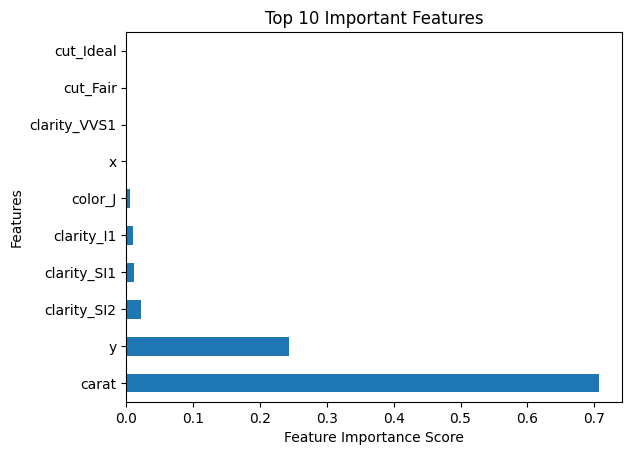


##### Model Validation and Accuracy Calculations ##########
      carat  cut_Ideal  cut_Good  cut_Very Good  cut_Fair  cut_Premium  \
0  0.106029        0.0       0.0            0.0       1.0          0.0   
1  0.145530        0.0       0.0            1.0       0.0          0.0   
2  0.076923        1.0       0.0            0.0       0.0          0.0   
3  0.064449        0.0       0.0            0.0       0.0          1.0   
4  0.205821        1.0       0.0            0.0       0.0          0.0   

   color_D  color_E  color_F  color_G  ...  clarity_SI1  clarity_SI2  \
0      0.0      0.0      0.0      0.0  ...          0.0          0.0   
1      0.0      1.0      0.0      0.0  ...          0.0          1.0   
2      0.0      0.0      0.0      1.0  ...          0.0          0.0   
3      0.0      1.0      0.0      0.0  ...          0.0          0.0   
4      0.0      0.0      0.0      0.0  ...          1.0          0.0   

   clarity_I1         x         y         z     table     dep

In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')
# Good range for max_depth is usually between 2 to 20, depending on the complexity of the data

# Print all the parameters of the Decision Tree
print(RegModel)

# Fit the Decision Tree model on the training data
DT = RegModel.fit(X_train, y_train)
prediction = DT.predict(X_test)

# Measuring the goodness of fit on training data
print('R2 Value:', metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for the top 10 most important columns
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')

# Creating a DataFrame with test results and predictions
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice']) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy based on MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



# Plotting/Visualising the Decision Tree:

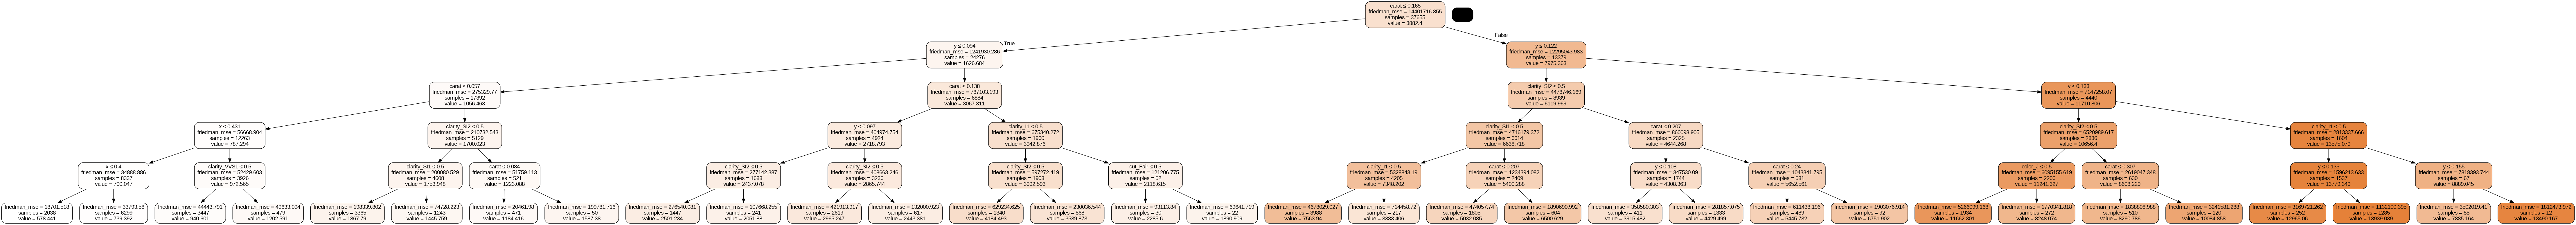

In [83]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the regression tree
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors,
                                filled=True, rounded=True,
                                special_characters=True)

# Draw graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png(), width=2000, height=2000)


# Random Forest Regressor:


RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9118670646000853


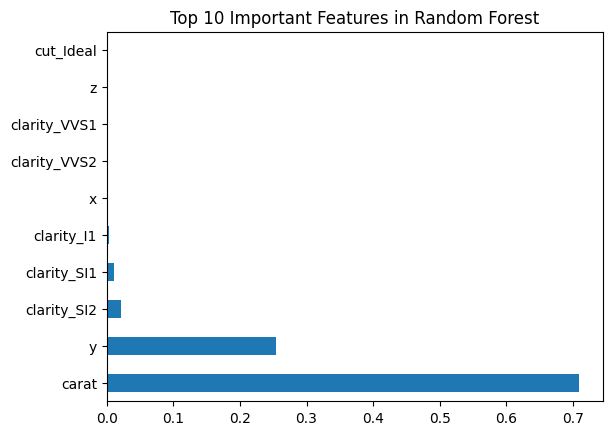


##### Model Validation and Accuracy Calculations ##########
      carat  cut_Ideal  cut_Good  cut_Very Good  cut_Fair  cut_Premium  \
0  0.106029        0.0       0.0            0.0       1.0          0.0   
1  0.145530        0.0       0.0            1.0       0.0          0.0   
2  0.076923        1.0       0.0            0.0       0.0          0.0   
3  0.064449        0.0       0.0            0.0       0.0          1.0   
4  0.205821        1.0       0.0            0.0       0.0          0.0   

   color_D  color_E  color_F  color_G  ...  clarity_SI1  clarity_SI2  \
0      0.0      0.0      0.0      0.0  ...          0.0          0.0   
1      0.0      1.0      0.0      0.0  ...          0.0          1.0   
2      0.0      0.0      0.0      1.0  ...          0.0          0.0   
3      0.0      1.0      0.0      0.0  ...          0.0          0.0   
4      0.0      0.0      0.0      0.0  ...          1.0          0.0   

   clarity_I1         x         y         z     table     dep

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='friedman_mse')
# Good range for max_depth is typically 2-10 and n_estimators between 100-1000 for larger datasets

# Print all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF = RegModel.fit(X_train, y_train)
prediction = RF.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features in Random Forest')
plt.show()

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice']) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Plotting One of the Decision Tree in Random Forest Regressor

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Ensure that 'Predictors' and 'TargetVariable' are defined.
# 'Predictors' should be a list of feature names used in the model
# 'TargetVariable' in regression would typically be 'price', which doesn't use class names as in classification

# Create DOT data for the 6th Decision Tree in the Random Forest
# Note: Ensure the Random Forest model 'RegModel' has been trained with at least 6 trees
dot_data = tree.export_graphviz(RegModel.estimators_[5], out_file=None,
                                feature_names=Predictors, filled=True,
                                rounded=True, special_characters=True)

# Generate the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show the graph
Image(graph.create_png(), width=2000, height=2000)


# Step 21: AdaBoost Algorithm For ML/AI model building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Initialize the base estimator - Decision Tree with specified depth
DTR = DecisionTreeRegressor(max_depth=3)

# Initialize AdaBoost Regressor with the Decision Tree as the base estimator
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR, learning_rate=0.04)

# Print all the parameters of AdaBoost
print(RegModel)

# Fit the model on Training Data
AB = RegModel.fit(X_train, y_train)
prediction = AB.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, AB.predict(X_train)))

# Feature importances are specific to tree-based regressors; AdaBoost may not directly provide this unless it's based on trees
if hasattr(AB, 'feature_importances_'):
    feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.show()

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# XGBoost Regressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Initialize the XGBRegressor
RegModel = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective='reg:squarederror',  # Updated from 'reg:linear' which is deprecated
    booster='gbtree'
)

# Print all the parameters of XGBoost
print(RegModel)

# Fit the model on Training Data
XGB = RegModel.fit(X_train, y_train, eval_metric="rmse")
prediction = XGB.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features in XGBoost')
plt.show()

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice']) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Plotting a single Decision tree out of XGBoost

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Setting up the plot for a single decision tree from the XGBoost model
fig, ax = plt.subplots(figsize=(30, 15))  # Adjusted size for better visibility

# Plotting the tree
# 'num_trees' should be less than the total number of trees in the model,
# and specifies which single tree should be plotted.
plot_tree(XGB, num_trees=10, ax=ax)  # num_trees=10 plots the 11th tree (index starts at 0)

# Display the plot
plt.show()


# K-Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize the K-Nearest Neighbors Regressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Print all the parameters of KNN
print(RegModel)

# Fit the model on Training Data
KNN = RegModel.fit(X_train, y_train)
prediction = KNN.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, KNN.predict(X_train)))

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Support Vector Machine (SVM) Regressor

In [ ]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Initialize the Support Vector Regressor
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Print all the parameters of SVM
print(RegModel)

# Fit the model on Training Data
SVM = RegModel.fit(X_train, y_train)
prediction = SVM.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, SVM.predict(X_train)))

# Model Validation and Accuracy Calculations
print('\n##### Model Validation and Accuracy Calculations ##########')
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['price'] - TestingDataResults['PredictedPrice']) / TestingDataResults['price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on the full dataset
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.
* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.
* I am choosing XGboost as the final model it has the highest accuracy!
* In order to deploy the model we follow steps outlined next.
* Train/Build the model again using 100% data available
* Save the model as a serialized file which can be stored anywhere.
* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction
* Choosing only the most important variables
* Its beneficial to keep lesser number of predictors for the model while deploying it in production.
* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more